<a href="https://colab.research.google.com/github/Txlu-OG/NN-DL/blob/main/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Assignment 12: Neural Network and Deep Learning Basics (Fashion-MNIST)
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

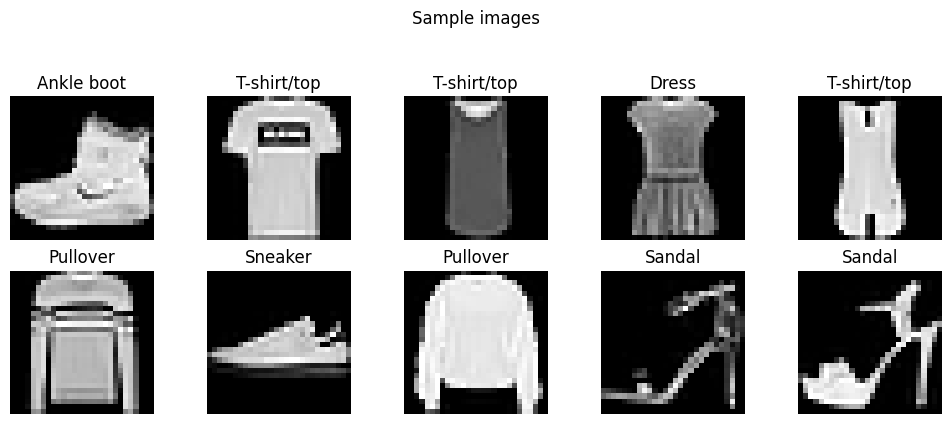

In [3]:
# Load dataset (Fashion-MNIST) and show a few samples
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.suptitle("Sample images", y=1.05)
plt.tight_layout()
plt.show()

In [4]:
# Preprocess: normalize to [0,1] and prepare inputs
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# keeping the 2D shape (28,28,1) and using a Flatten layer inside the model
x_train_4d = x_train[..., np.newaxis]   # (N, 28, 28, 1)
x_test_4d  = x_test[..., np.newaxis]

In [5]:
# Helper to train, plot, and evaluate a model
def train_and_evaluate(model, name, x_tr, y_tr, x_te, y_te, epochs=15, batch_size=64, val_split=0.2):
    print(f"\n=== Training: {name} ===")
    history = model.fit(
        x_tr, y_tr,
        epochs=epochs, batch_size=batch_size,
        validation_split=val_split, verbose=2
    )

    # Curves
    plt.figure()
    plt.plot(history.history["accuracy"], label="train acc")
    plt.plot(history.history["val_accuracy"], label="val acc")
    plt.title(f"{name} - Accuracy")
    plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.show()

    plt.figure()
    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="val loss")
    plt.title(f"{name} - Loss")
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

    # Evaluation on test set
    y_prob = model.predict(x_te, verbose=0)
    y_pred = np.argmax(y_prob, axis=1)

    print(f"\n{name} - Classification report:")
    print(classification_report(y_te, y_pred, target_names=class_names, digits=4))

    # Aggregate metrics (macro averages)
    acc = (y_pred == y_te).mean()
    prec = precision_score(y_te, y_pred, average="macro", zero_division=0)
    rec  = recall_score(y_te, y_pred, average="macro", zero_division=0)
    f1   = f1_score(y_te, y_pred, average="macro", zero_division=0)
    print(f"{name} - Test Accuracy: {acc:.4f}, Macro Precision: {prec:.4f}, Macro Recall: {rec:.4f}, Macro F1: {f1:.4f}")

    # Confusion matrix (normalized)
    cm = confusion_matrix(y_te, y_pred, normalize="true")
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} - Confusion Matrix (normalized)")
    plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

    return {"name": name, "acc": acc, "prec": prec, "rec": rec, "f1": f1}


=== Training: Baseline MLP ===
Epoch 1/12
750/750 - 6s - 8ms/step - accuracy: 0.8130 - loss: 0.5393 - val_accuracy: 0.8462 - val_loss: 0.4315
Epoch 2/12
750/750 - 4s - 6ms/step - accuracy: 0.8581 - loss: 0.3979 - val_accuracy: 0.8553 - val_loss: 0.3961
Epoch 3/12
750/750 - 5s - 7ms/step - accuracy: 0.8717 - loss: 0.3594 - val_accuracy: 0.8748 - val_loss: 0.3535
Epoch 4/12
750/750 - 5s - 7ms/step - accuracy: 0.8791 - loss: 0.3329 - val_accuracy: 0.8742 - val_loss: 0.3471
Epoch 5/12
750/750 - 4s - 5ms/step - accuracy: 0.8865 - loss: 0.3100 - val_accuracy: 0.8772 - val_loss: 0.3393
Epoch 6/12
750/750 - 4s - 5ms/step - accuracy: 0.8918 - loss: 0.2930 - val_accuracy: 0.8850 - val_loss: 0.3270
Epoch 7/12
750/750 - 5s - 6ms/step - accuracy: 0.8982 - loss: 0.2780 - val_accuracy: 0.8823 - val_loss: 0.3241
Epoch 8/12
750/750 - 3s - 5ms/step - accuracy: 0.9013 - loss: 0.2685 - val_accuracy: 0.8743 - val_loss: 0.3505
Epoch 9/12
750/750 - 4s - 5ms/step - accuracy: 0.9055 - loss: 0.2565 - val_accur

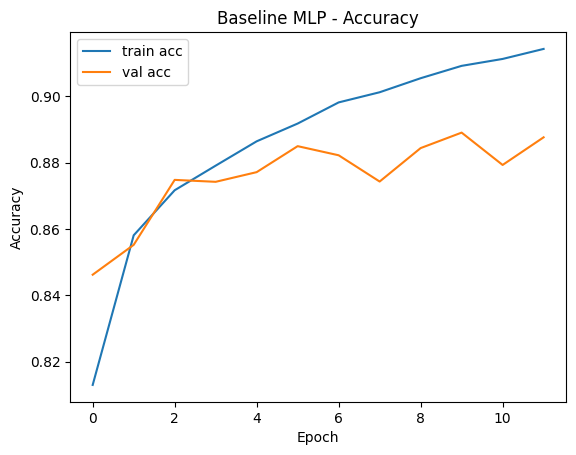

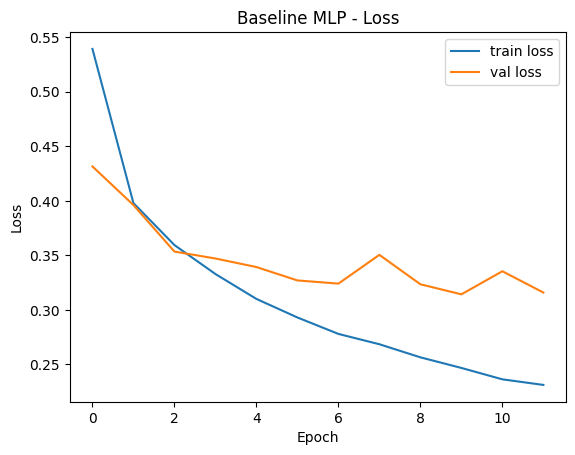


Baseline MLP - Classification report:
              precision    recall  f1-score   support

 T-shirt/top     0.7978    0.8800    0.8369      1000
     Trouser     0.9819    0.9740    0.9779      1000
    Pullover     0.7239    0.8310    0.7737      1000
       Dress     0.8885    0.9000    0.8942      1000
        Coat     0.8189    0.7460    0.7807      1000
      Sandal     0.9659    0.9620    0.9639      1000
       Shirt     0.7370    0.6080    0.6663      1000
     Sneaker     0.9435    0.9520    0.9477      1000
         Bag     0.9681    0.9720    0.9701      1000
  Ankle boot     0.9570    0.9560    0.9565      1000

    accuracy                         0.8781     10000
   macro avg     0.8782    0.8781    0.8768     10000
weighted avg     0.8782    0.8781    0.8768     10000

Baseline MLP - Test Accuracy: 0.8781, Macro Precision: 0.8782, Macro Recall: 0.8781, Macro F1: 0.8768


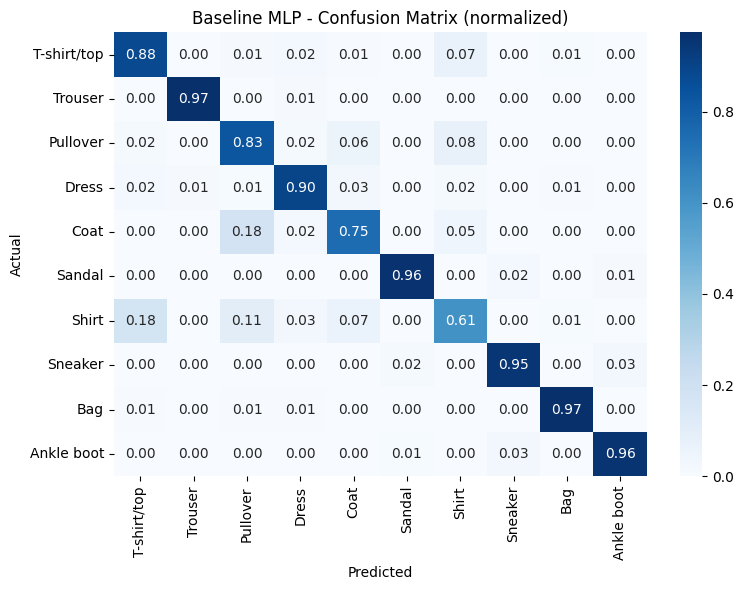

In [6]:
# Baseline feedforward model (simple MLP: Flatten to Dense to Softmax)
baseline = keras.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
baseline.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

res_baseline = train_and_evaluate(baseline, "Baseline MLP", x_train_4d, y_train, x_test_4d, y_test,
                                  epochs=12, batch_size=64, val_split=0.2)


=== Training: Improved MLP (deeper + dropout) ===
Epoch 1/12
750/750 - 7s - 9ms/step - accuracy: 0.7940 - loss: 0.5713 - val_accuracy: 0.8472 - val_loss: 0.4181
Epoch 2/12
750/750 - 6s - 8ms/step - accuracy: 0.8443 - loss: 0.4258 - val_accuracy: 0.8646 - val_loss: 0.3861
Epoch 3/12
750/750 - 10s - 14ms/step - accuracy: 0.8582 - loss: 0.3922 - val_accuracy: 0.8740 - val_loss: 0.3611
Epoch 4/12
750/750 - 5s - 7ms/step - accuracy: 0.8670 - loss: 0.3647 - val_accuracy: 0.8658 - val_loss: 0.3704
Epoch 5/12
750/750 - 6s - 8ms/step - accuracy: 0.8720 - loss: 0.3558 - val_accuracy: 0.8804 - val_loss: 0.3382
Epoch 6/12
750/750 - 6s - 8ms/step - accuracy: 0.8763 - loss: 0.3421 - val_accuracy: 0.8819 - val_loss: 0.3335
Epoch 7/12
750/750 - 5s - 7ms/step - accuracy: 0.8808 - loss: 0.3338 - val_accuracy: 0.8744 - val_loss: 0.3643
Epoch 8/12
750/750 - 7s - 9ms/step - accuracy: 0.8823 - loss: 0.3287 - val_accuracy: 0.8823 - val_loss: 0.3407
Epoch 9/12
750/750 - 5s - 7ms/step - accuracy: 0.8839 - los

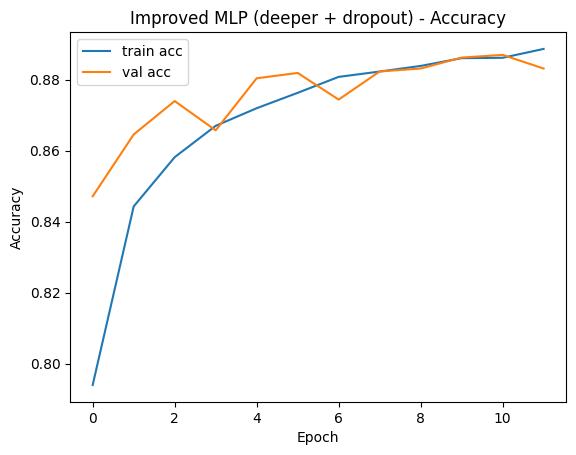

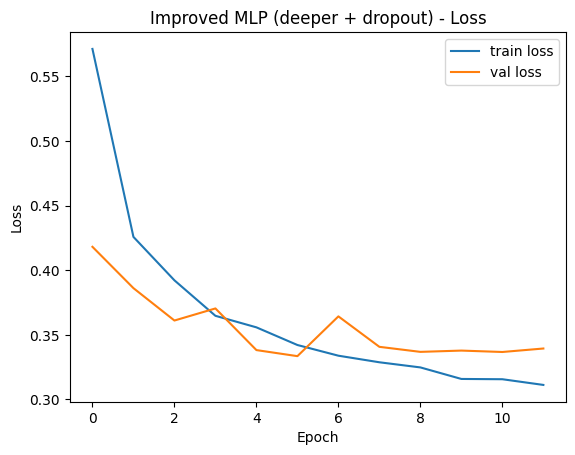


Improved MLP (deeper + dropout) - Classification report:
              precision    recall  f1-score   support

 T-shirt/top     0.8187    0.8400    0.8292      1000
     Trouser     0.9848    0.9710    0.9778      1000
    Pullover     0.7460    0.8430    0.7915      1000
       Dress     0.7822    0.9410    0.8543      1000
        Coat     0.7925    0.7980    0.7952      1000
      Sandal     0.9727    0.9630    0.9678      1000
       Shirt     0.8250    0.5420    0.6542      1000
     Sneaker     0.9455    0.9540    0.9497      1000
         Bag     0.9777    0.9660    0.9718      1000
  Ankle boot     0.9562    0.9600    0.9581      1000

    accuracy                         0.8778     10000
   macro avg     0.8801    0.8778    0.8750     10000
weighted avg     0.8801    0.8778    0.8750     10000

Improved MLP (deeper + dropout) - Test Accuracy: 0.8778, Macro Precision: 0.8801, Macro Recall: 0.8778, Macro F1: 0.8750


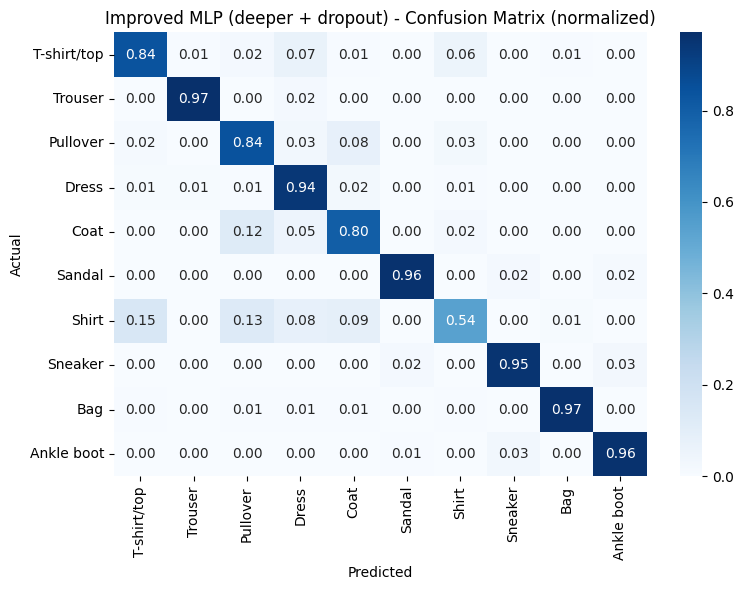

In [7]:
# Model
improved = keras.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
improved.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

res_improved = train_and_evaluate(improved, "Improved MLP (deeper + dropout)", x_train_4d, y_train, x_test_4d, y_test,
                                  epochs=12, batch_size=64, val_split=0.2)

In [8]:
# Data augmentation (small rotations/shift), train a short run to see impact
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.10,
    height_shift_range=0.10
)
datagen.fit(x_train_4d)

augmented = keras.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
augmented.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

print("\n=== Training: MLP with data augmentation (short run) ===")
# Few epochs to demonstrate effect
history_aug = augmented.fit(
    datagen.flow(x_train_4d, y_train, batch_size=64),
    steps_per_epoch=len(x_train)//64,
    epochs=5, verbose=2,
    validation_data=(x_test_4d, y_test)
)


=== Training: MLP with data augmentation (short run) ===
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 - 25s - 27ms/step - accuracy: 0.6997 - loss: 0.8173 - val_accuracy: 0.7880 - val_loss: 0.6009
Epoch 2/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 768us/step - accuracy: 0.8125 - loss: 0.5376 - val_accuracy: 0.7817 - val_loss: 0.5985
Epoch 3/5
937/937 - 39s - 42ms/step - accuracy: 0.7612 - loss: 0.6446 - val_accuracy: 0.7822 - val_loss: 0.5857
Epoch 4/5
937/937 - 1s - 772us/step - accuracy: 0.8594 - loss: 0.4917 - val_accuracy: 0.7824 - val_loss: 0.5860
Epoch 5/5
937/937 - 24s - 26ms/step - accuracy: 0.7770 - loss: 0.5969 - val_accuracy: 0.7929 - val_loss: 0.5361



MLP + Augmentation - Classification report:
              precision    recall  f1-score   support

 T-shirt/top     0.7116    0.8390    0.7701      1000
     Trouser     0.9688    0.9300    0.9490      1000
    Pullover     0.6033    0.5810    0.5920      1000
       Dress     0.8050    0.8340    0.8193      1000
        Coat     0.5653    0.8440    0.6771      1000
      Sandal     0.9468    0.9260    0.9363      1000
       Shirt     0.5089    0.1720    0.2571      1000
     Sneaker     0.9022    0.9130    0.9076      1000
         Bag     0.9270    0.9520    0.9393      1000
  Ankle boot     0.9250    0.9380    0.9315      1000

    accuracy                         0.7929     10000
   macro avg     0.7864    0.7929    0.7779     10000
weighted avg     0.7864    0.7929    0.7779     10000

MLP + Aug - Test Accuracy: 0.7929, Macro Precision: 0.7864, Macro Recall: 0.7929, Macro F1: 0.7779


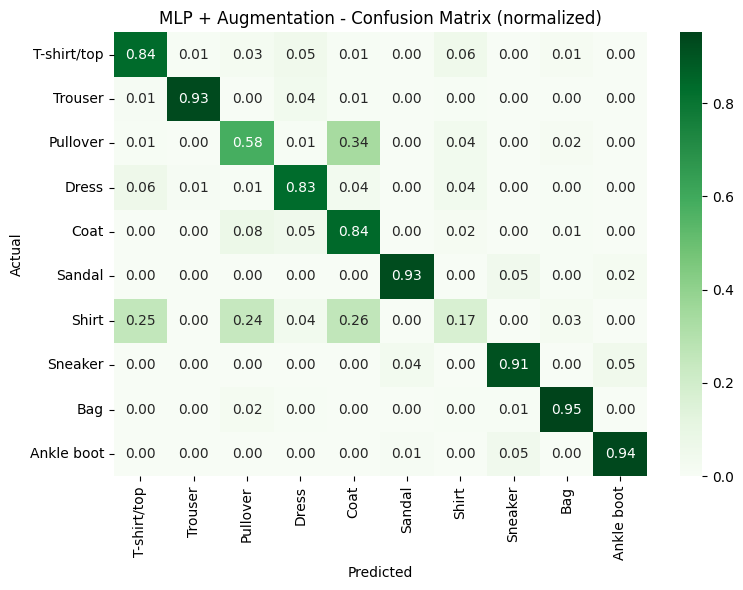

In [9]:
# Evaluate augmented model
y_prob_aug = augmented.predict(x_test_4d, verbose=0)
y_pred_aug = np.argmax(y_prob_aug, axis=1)
print("\nMLP + Augmentation - Classification report:")
print(classification_report(y_test, y_pred_aug, target_names=class_names, digits=4))

acc_aug = (y_pred_aug == y_test).mean()
prec_aug = precision_score(y_test, y_pred_aug, average="macro", zero_division=0)
rec_aug  = recall_score(y_test, y_pred_aug, average="macro", zero_division=0)
f1_aug   = f1_score(y_test, y_pred_aug, average="macro", zero_division=0)
print(f"MLP + Aug - Test Accuracy: {acc_aug:.4f}, Macro Precision: {prec_aug:.4f}, Macro Recall: {rec_aug:.4f}, Macro F1: {f1_aug:.4f}")

cm_aug = confusion_matrix(y_test, y_pred_aug, normalize="true")
plt.figure(figsize=(8,6))
sns.heatmap(cm_aug, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.title("MLP + Augmentation - Confusion Matrix (normalized)")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

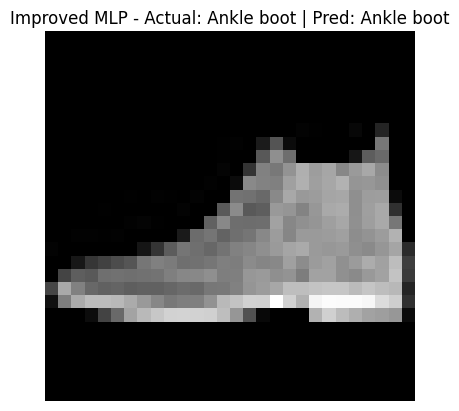

In [10]:
# Tiny “application” demo: predict one test image
def predict_one(idx, model, name):
    plt.imshow(x_test[idx], cmap="gray"); plt.axis("off")
    pred = np.argmax(model.predict(x_test_4d[idx:idx+1], verbose=0), axis=1)[0]
    plt.title(f"{name} - Actual: {class_names[y_test[idx]]} | Pred: {class_names[pred]}")
    plt.show()

predict_one(0, improved, "Improved MLP")

In [11]:
# Simple comparison table to summarize
import pandas as pd
summary = pd.DataFrame([
    {"Model":"Baseline MLP", "Accuracy":res_baseline["acc"], "Macro F1":res_baseline["f1"]},
    {"Model":"Improved MLP", "Accuracy":res_improved["acc"], "Macro F1":res_improved["f1"]},
    {"Model":"MLP + Aug (5 epochs)", "Accuracy":acc_aug, "Macro F1":f1_aug},
]).round(4)
print("\nSummary:")
print(summary)



Summary:
                  Model  Accuracy  Macro F1
0          Baseline MLP    0.8781    0.8768
1          Improved MLP    0.8778    0.8750
2  MLP + Aug (5 epochs)    0.7929    0.7779
